In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/Final Dataset/testing/Empty/00a2d16e-742e-469f-a23a-631ad49ec790.jpg  
  inflating: /content/Final Dataset/testing/Empty/01d0f221-a94d-44ce-ba07-462f2f46f62c.jpg  
  inflating: /content/Final Dataset/testing/Empty/02bbbe52-297c-4eed-aac2-de40ad6bd0b8.jpg  
  inflating: /content/Final Dataset/testing/Empty/0a175e12-bade-49c4-ad00-c07329ce5fd4.jpg  
  inflating: /content/Final Dataset/testing/Empty/0a37454f-40c2-4302-9e8b-23af7b95875b.jpg  
  inflating: /content/Final Dataset/testing/Empty/0a7b874b-20dd-4ab2-b2ed-89645e4c20bc.jpg  
  inflating: /content/Final Dataset/testing/Empty/0a86cfa7-7b99-4ce7-8da8-42c51d2eafff.jpg  
  inflating: /content/Final Dataset/testing/Empty/0aad5c2c-a166-416a-9d6d-3e5da232a5ae.jpg  
  inflating: /content/Final Dataset/testing/Empty/0acd3ef9-fa98-4e37-aca9-58e4848e36fd.jpg  
  inflating: /content/Final Dataset/testing/Empty/0b6dc85e-a9ba-4d74-8682-d4dd58587bef.jpg  
  inflating: /content/Fin

In [ ]:
import os
import shutil
import random
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the directories for the train, validation, and test sets
train_dir = '/content/Final Dataset/training'
val_dir = '/content/Final Dataset/validation'
test_dir = '/content/Final Dataset/testing'
# Define the image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 64
# Define the data generators for the train, validation, and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')

Found 3378 images belonging to 5 classes.
Found 340 images belonging to 5 classes.
Found 340 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained Xception model without the top (classification) layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained Xception model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add more layers here
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               51380736  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)               

In [ ]:
num_epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/100
52/52 [==============================] - 45s 793ms/step - loss: 2.8548 - accuracy: 0.4439 - val_loss: 0.8469 - val_accuracy: 0.5813
Epoch 2/100
52/52 [==============================] - 41s 788ms/step - loss: 1.0147 - accuracy: 0.5652 - val_loss: 0.7960 - val_accuracy: 0.6438
Epoch 3/100
52/52 [==============================] - 41s 796ms/step - loss: 0.8916 - accuracy: 0.6231 - val_loss: 0.7058 - val_accuracy: 0.6594
Epoch 4/100
52/52 [==============================] - 41s 796ms/step - loss: 0.8353 - accuracy: 0.6506 - val_loss: 0.6605 - val_accuracy: 0.7000
Epoch 5/100
52/52 [==============================] - 41s 790ms/step - loss: 0.7965 - accuracy: 0.6530 - val_loss: 0.6315 - val_accuracy: 0.7094
Epoch 6/100
52/52 [==============================] - 41s 794ms/step - loss: 0.7993 - accuracy: 0.6587 - val_loss: 0.6852 - val_accuracy: 0.7312
Epoch 7/100
52/52 [==============================] - 41s 793ms/step - loss: 0.7876 - accuracy: 0.6705 - val_loss: 0.6328 - val_accuracy:

Found 3378 images belonging to 5 classes.
Found 340 images belonging to 5 classes.
Found 320 images belonging to 5 classes.
1/1 [==============================] - 1s 765ms/step


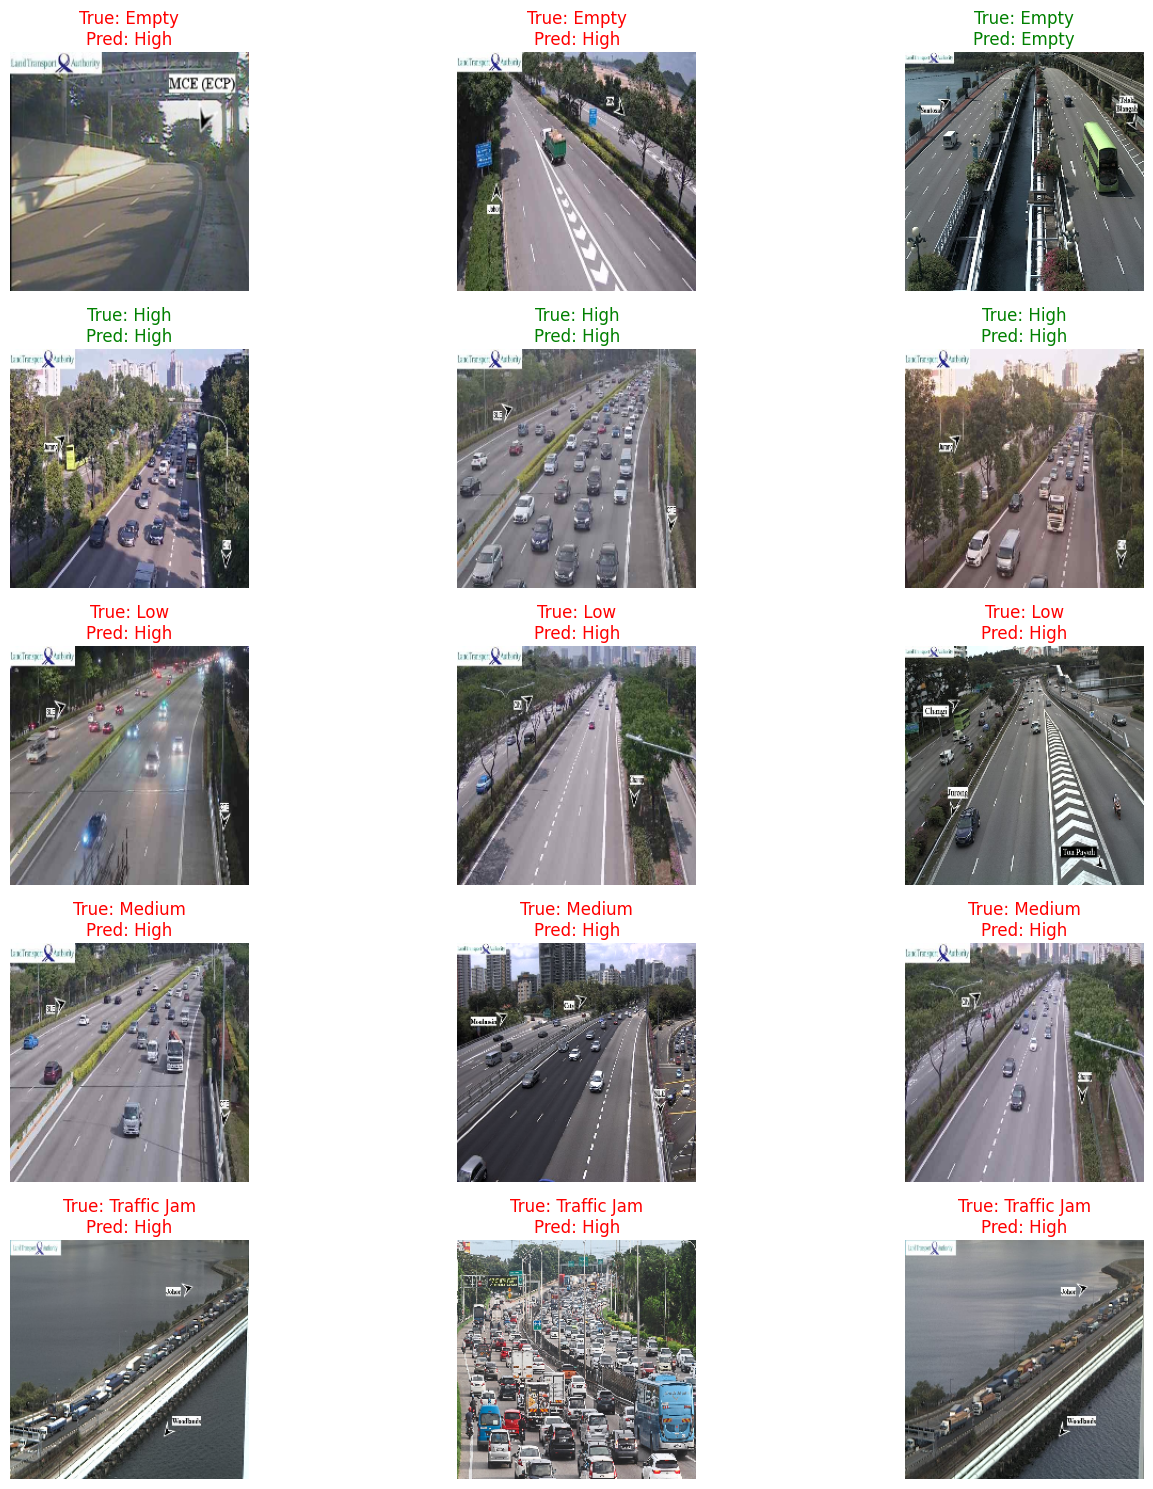

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

# Define directories and image dimensions
train_dir = '/content/Final Dataset/training'
val_dir = '/content/Final Dataset/validation'
test_dir = '/content/Final Dataset/testing'
img_height = 224
img_width = 224
batch_size = 64

# Data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  color_mode='rgb')

# Load the pre-trained Xception model without the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# num_epochs = 80
# history = model.fit(train_generator,
#                     steps_per_epoch=train_generator.samples // batch_size,
#                     epochs=num_epochs,
#                     validation_data=val_generator,
#                     validation_steps=val_generator.samples // batch_size)

# # Display model summary
# model.summary()

# Function to load random images from each class
def load_random_images(directory, num_images=5):
    images = []
    labels = []
    class_labels = list(train_generator.class_indices.keys())

    for label in class_labels:
        class_dir = os.path.join(directory, label)
        image_files = random.sample(os.listdir(class_dir), num_images)

        for image_file in image_files:
            image_path = os.path.join(class_dir, image_file)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (img_width, img_height))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load random images from the test directory
images, true_labels = load_random_images(test_dir, num_images=3)

# Preprocess images
images_preprocessed = np.array([preprocess_input(img.astype(np.float32)) for img in images])

# Make predictions
predictions = model.predict(images_preprocessed)
predicted_labels = [list(train_generator.class_indices.keys())[np.argmax(pred)] for pred in predictions]


# Display the images in a grid with their true and predicted labels
fig, axes = plt.subplots(len(train_generator.class_indices), 3, figsize=(15, 15))
axes = axes.flatten()

for i, (img, true_label, pred_label) in enumerate(zip(images, true_labels, predicted_labels)):
    axes[i].imshow(img)
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
